# Intoducción Aprendizaje Estadístico
Este notebook resume las ideas principales del aprendizaje estadistico



## Table of Contents

- [Scikit-Learn](#1)
- [Datos y exploracion inicial](#2)
- [Separar muestra de entrenamiento y prueba](#3)
- [K-Vecinos mas cercanos](#4)
- [Regresion Lineal](#5)



<a name='1'></a>
## Scikit-Learn ##

Es una librería creada a partir de *numpy, matplotlib y scipy* que provee una gran cantidad de algoritmos de ML para ejecutar tareas de clasificación, regresión, reducción de dimensionalidad y segmentación. También contiene funcionalidades para extraer características, procesamiento y selección de variables y evaluación de modelos.

- Instalación: i) pip install -U scikit-learn, ii) Anaconda

Sklearn cuenta con múltiples módulos y cada módulo cuenta con varias funciones. Principales módulos:

- sklearn.datasets
- sklearn.preprocessing
- sklearn.impute
- sklearn.cross_validation
- sklearn.linear_model
- sklearn.neighbors
- sklearn.ensemble
- sklearn.cluster
- sklearn.metrics

In [14]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/10.6 MB 825.8 kB/s eta 0:00:13
    --------------------------------------- 0.1/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.6 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/10.6 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.6 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.6 MB 5.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 4.7 MB/s eta 0:00:02
   ------- ---------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\arias\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



<a name='2'></a>
## Datos y exploracion inicial ##

In [15]:
# Scikit tiene muchas funcionalidades. Buena práctica es llamar módulos y funciones por separado

from sklearn.datasets import make_moons   # Importar el módulo make moons desde scikit learn para crear los datos

# Para hacer graficas vamos a utilizar la libreria matplotlib

import matplotlib.pyplot as plt

In [16]:
# Usar make_moons para crear una base de datos de 1000 observaciones con 0.2 desviaciones estándar de ruido gausiano, establezca como semilla 888

X, y = make_moons(n_samples= 1000, random_state=888, noise=0.2)

print(X[:10, ])
print(y[:10])


# Mostrar las proporciones de la marca (variable a predecir)
import numpy as np
np.sum(y)/len(y)

[[ 0.57925087 -0.43900292]
 [ 1.7410703   0.41655357]
 [ 2.16670204  0.28401191]
 [ 0.03747799  1.31372085]
 [ 0.08191925  1.21323957]
 [-1.22405263  0.92110719]
 [ 0.94018675 -0.13779717]
 [ 0.6545524   0.64399088]
 [-0.75625927  0.28222399]
 [-0.52831931  0.50104647]]
[1 1 1 0 0 0 1 0 0 1]


0.5

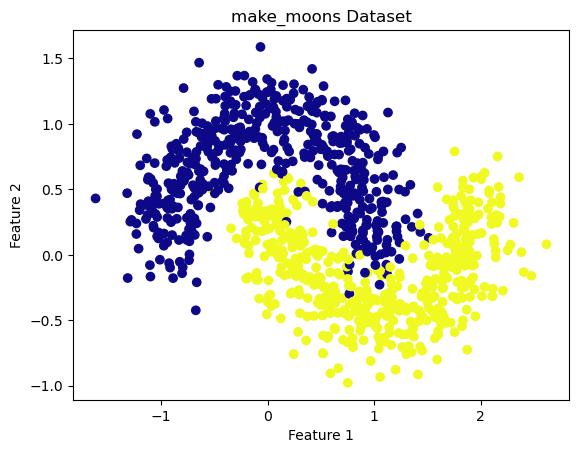

In [17]:
# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title("make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<a name='3'></a>
## Separar muestra de entrenamiento y prueba ##


In [18]:
# Importar la función train_test_split desde el módulo model_selection (sklearn)

from sklearn.model_selection import train_test_split

# Separar datos de entrenamiento y prueba: 70% entrenamiento, 30% prueba (usar train_test_split)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=888, test_size=0.3)

<a name='4'></a>
## K-vecinos mas cercanos ##

- Benchmark para otras técnicas.
- Algoritmo supervisado, no paramétrico, *instance-based*.
- Costo computacional y costo en memoria.
- Entrenamiento mínimo pero validación costosa.
- Las observaciones se clasifican de acuerdo a la clase más frecuente de sus K vecinos más próximos.
- Sensible a atributos irrelevantes, outliers y grandes rangos en las variables.
- **Importante: selección de DISTANCIA y K.**
- K pequeño muy sensible a ruido, K grande inclusión de puntos lejanos.


![title](knn.PNG)

### Crear modelos con diferentes números de vecinos

In [5]:
# Importar KNeighborsClassifier desde el módulo neighbors (sklearn)
from sklearn.neighbors import KNeighborsClassifier 

In [19]:
# Crear modelo con k=400 vecinos usando KneighborsClassifier, ajustar a la muestra de entrenamiento

knn400 = KNeighborsClassifier(n_neighbors = 400)
knn400.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=400)

In [20]:
# Crear modelo con k=1 vecinos usando KneighborsClassifier, ajustar a la muestra de entrenamiento

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Fronteras de decisión: flexibilidad, sesgo y varianza

In [21]:
def graficar_fronteras(X,y, model,  h=0.02, b=0.05):
    
    '''Esta función sirve para graficar la frontera generada por la configuración de K-vecinos más cercanos.
       Argumentos de entrada: X (características), y (marca), modelo de knn.
    '''
    
    # Importar librerías necesarias
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib.colors import ListedColormap

    
    # Graficar una frontera de decisión, para ello, asignamos un color a cada punto en la malla  [x_min, x_max]x[y_min, y_max]
    x_min, x_max = X[:, 0].min() - b, X[:, 0].max() + b
    y_min, y_max = X[:, 1].min() - b, X[:, 1].max() + b
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    boundary = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Colocar el resultado en gráfico de color
    boundary = boundary.reshape(xx.shape)  
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    plt.figure()
    plt.pcolormesh(xx, yy, boundary, cmap=cmap_light)

    # Graficar también los datos reales
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis('tight')

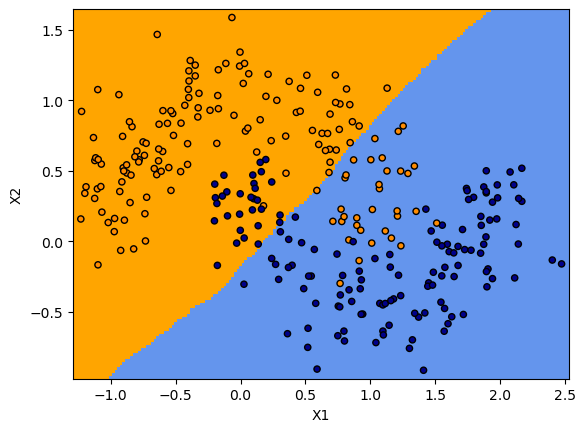

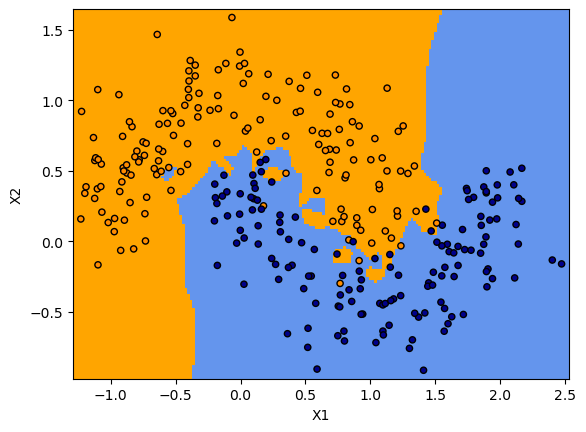

In [22]:
# Usar la función graficar_fronteras para observar la frontera generada por 400 y 1 vecinos más cercanos en los datos de prueba

graficar_fronteras(x_test, y_test, knn400)
graficar_fronteras(x_test, y_test, knn1)

### Función de pérdida

Pregunta fundamental: **¿óptimo en qué sentido?** -> Métricas de desempeño

Existen muchas medidas que nos permiten saber el grado de equivocación de nuestro modelo. La más básica para problemas de clasificación es *accuracy* (usar con cuidado!). Teniendo en cuenta la matriz de confusión,

![title](MC.png)


**accuracy o exactitud** se calcula como $\frac{VP+VN}{VP+VN+FP+FN}$

### Sesgo vs Varianza

In [30]:
# Importar accuracy_score desde el módulo metrics (sklearn)

from sklearn.metrics import accuracy_score

# Crear un loop (for) para validar el resultado en accuracy para distintos k. Guardar los resultados en entrenamiento y prueba
train_scores = []
test_scores = []

vecinos=np.arange(1, 50, 1)

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_scores.append(1-accuracy_score(y_train, knn.predict(x_train)))
    test_scores.append(1- accuracy_score(y_test, knn.predict(x_test)))

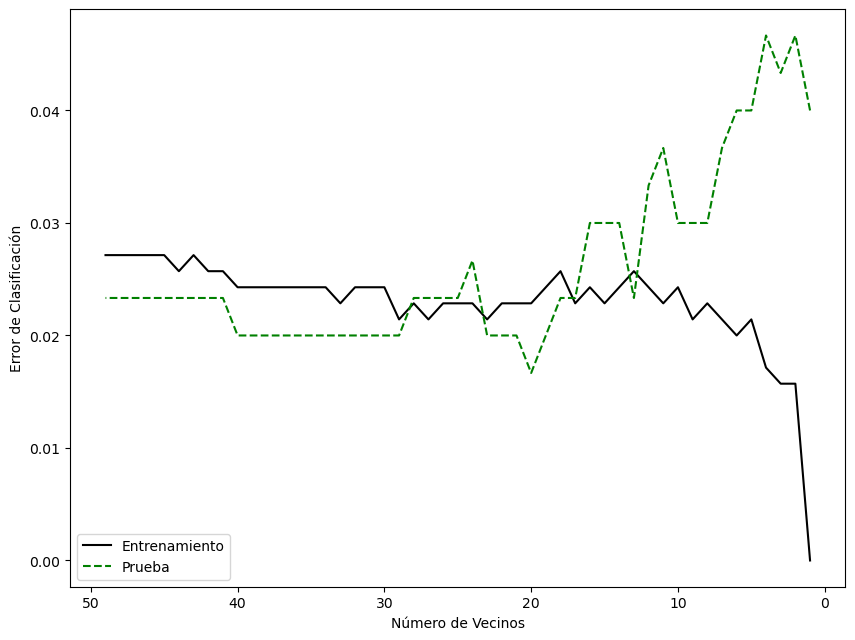

In [31]:
# Importe pyplot (matplotlib) como plt

from matplotlib import pyplot as plt

# Gráfique los resultados del loop

plt.figure(figsize=(10,7.5))
plt.plot(vecinos, train_scores, c="black", label="Entrenamiento")
plt.plot(vecinos, test_scores, c="green", linestyle="--", label="Prueba")
plt.xlabel('Número de Vecinos')
plt.ylabel('Error de Clasificación')
plt.gca().invert_xaxis()
plt.legend(loc = "lower left")
plt.show()

In [29]:
min_value = min(test_scores)
min_index = test_scores.index(min_value)
print("número óptimo de vecinos en prueba", vecinos[min_index])

número óptimo de vecinos en prueba 20


### Validacion Cruzada

In [32]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.965, 0.985, 0.97 , 0.965, 0.975])

<a name='5'></a>
## Regresion Lineal ##


### Datos y exploracion inicial

In [1]:
# Importar make_regression  desde el módulo datasets (sklearn)

from sklearn.datasets import make_regression

# Generar datos simulados con make_regression
X, y = make_regression(n_samples=500, n_features=10,
                          random_state=1, bias=3.5)

In [2]:
# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title("make_regression Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

NameError: name 'plt' is not defined

### Separar muestra de entrenamiento y de prueba

In [15]:
# Separar datos de entrenamiento y prueba: 70% entrenamiento, 30% prueba

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=888, test_size=0.2)

### Regresión Lineal

In [16]:
# Importar LinearRegression desde el módulo de linear_model (sklearn)
from sklearn.linear_model import LinearRegression

# Crear modelo con LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

# Predecir con las características de prueba

reg_pred=reg.predict(x_test)

# Desempeño del modelo

np.sqrt(np.mean((reg_pred-y_test)**2))

1.1727883998379201e-13